In [ ]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
!pip install segmentation-models


In [4]:
import tensorflow as tf
import segmentation_models as sm
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


In [ ]:
from PIL import Image

In [ ]:
input_dire = "Original/image/"
target_dire = "Original/label/"

input_img_RIM = sorted(
    [
        os.path.join(input_dire, fname)
        for fname in os.listdir(input_dire)
        if fname.endswith(".jpg")
        
    ]
)
target_img_RIM = sorted(
    [
        os.path.join(target_dire, fname)
        for fname in os.listdir(target_dire)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

In [ ]:
print(input_img_RIM[145])
print(target_img_RIM[145])
print(len(input_img_RIM))
print(len(target_img_RIM))

Original/image/S-29-R.jpg
Original/label/S-29-R-Cup-Avg.png
159
159


In [ ]:
cont = 1

In [ ]:

for x in range(len(input_img_RIM)):
  original = Image.open(input_img_RIM[x])
  original_Mask = Image.open(target_img_RIM[x])
  width, height = original.size
  if (width != 2144):
    wid = 1500
    h = 1424
    x = 520
  else:
    wid = width/2
    h = height
    x = 0
  imghalf = original.crop((x, 0, wid, h))
  imghalf_Mask = original_Mask.crop((x, 0, wid, h))  
  imghalf.save('data/train/image/'+str(cont)+'.png')
  imghalf_Mask.save('data/train/label/'+str(cont)+'.png')
  cont = cont+1

In [ ]:
print(cont)

160


In [ ]:
for img in os.listdir(input_dire):
  os.remove(input_dire+"/"+img)


In [ ]:
for img in os.listdir(target_dire):
  os.remove(target_dire+"/"+img)


In [ ]:


input_dir = "data/train/image/"
target_dir = "data/train/label/"


input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
        
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Numero de imagens:", len(input_img_paths))
print("Numero de mascaras:", len(target_img_paths))


Numero de imagens: 159
Numero de mascaras: 159


In [ ]:
print(input_img_paths[140])
print(target_img_paths[140])
print(len(input_img_paths))
print(len(target_img_paths))

data/train/image/82.png
data/train/label/82.png
159
159


In [ ]:
cont = 160 #tirar

In [ ]:

for x in range(len(input_img_paths)):
  img = cv2.imread(input_img_paths[x], cv2.COLOR_BGR2RGB)
  mask = cv2.imread(target_img_paths[x])
  img = img[:,:, ::-1]
  #Aplicar Auguem..
  flip_1 = tf.image.flip_up_down(img)
  flipM_1 = tf.image.flip_up_down(mask)
  filename = str(cont)+'.png'
  tf.keras.utils.save_img('data/train/image/'+filename, flip_1)
  tf.keras.utils.save_img('data/train/label/'+filename, flipM_1)
  cont = cont+1
  flip_2 = tf.image.flip_left_right(img)
  flipM_2 = tf.image.flip_left_right(mask)
  filename = str(cont)+'.png'
  tf.keras.utils.save_img('data/train/image/'+filename, flip_2)
  tf.keras.utils.save_img('data/train/label/'+filename, flipM_2)
  cont = cont+1
  rot_90 = tf.image.rot90(img, k=1)
  rotM_90 = tf.image.rot90(mask,k=1)
  filename = str(cont)+'.png'
  tf.keras.utils.save_img('data/train/image/'+filename, rot_90)
  tf.keras.utils.save_img('data/train/label/'+filename, rotM_90)
  cont = cont+1
  rot_180 = tf.image.rot90(img, k=2)
  rotM_180 = tf.image.rot90(mask,k=2)
  filename = str(cont)+'.png'
  tf.keras.utils.save_img('data/train/image/'+filename, rot_180)
  tf.keras.utils.save_img('data/train/label/'+filename, rotM_180)
  cont = cont+1


In [5]:
input_dir = "data/train/image/"
target_dir = "data/train/label/"


input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
        
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Numero de imagens:", len(input_img_paths))
print("Numero de mascaras:", len(target_img_paths))


Numero de imagens: 795
Numero de mascaras: 795


In [6]:
training_images = []
masks = []
for x in range(len(input_img_paths)):
  img = cv2.imread(input_img_paths[x], cv2.IMREAD_COLOR)
  img = cv2.resize(img, (512,512))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  mask = cv2.imread(target_img_paths[x]) 
  #mask = cv2.resize(mask, (256,256))
  hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)
  thresh1 = cv2.threshold(s, 92, 255, cv2.THRESH_BINARY)[1]

  # threshold value image and invert
  thresh2 = cv2.threshold(v, 128, 255, cv2.THRESH_BINARY)[1]
  thresh2 = 255 - thresh2

  # combine the two threshold images as a mask
  mask = cv2.add(thresh1,thresh2)
  rmask = cv2.bitwise_not(mask)
  rmask = cv2.resize(rmask, (512,512))
  training_images.append(img)
  masks.append(rmask)

training_images = np.array(training_images)
masks = np.array(masks)

training_images = training_images/255.0
masks = masks/255.0


In [7]:
print(len(training_images))
print(len(masks))

795
795


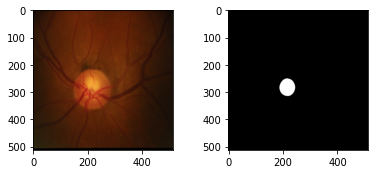

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
#ax.imshow(np.reshape(X[0], (256, 256)), cmap="gray")
ax.imshow(training_images[141], cmap="gray")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(masks[141], cmap="gray")



In [ ]:
#Use customary x_train and y_train variables
X = training_images
Y = masks
Y = np.expand_dims(Y, axis=3) #May not be necessary.. leftover from previous code 

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [ ]:
print(len(X))
print(len(Y))

209
209


In [ ]:
import tensorflow.keras.backend as K

def weighted_binary_crossentropy(zero_weight, one_weight):

    def weighted_binary_crossentropy(y_true, y_pred):

        b_ce = K.binary_crossentropy(y_true, y_pred)

        # weighted calc
        weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce

        return K.mean(weighted_b_ce)

    return weighted_binary_crossentropy

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

In [ ]:
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-4)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
y_ints = [y.argmax() for y in y_train]

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)


In [ ]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
#model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score],)
model.compile(optimizer=opt, loss=weighted_binary_crossentropy(0.80, 0.20), metrics=[dice_coef])

#model.summary()


85532672/85521592 [==============================] - 2s 0us/step


In [ ]:

history = model.fit(
   x=x_train,
   y=y_train,
   batch_size=8,
   epochs=130,
   verbose=1,
   validation_data=(x_val, y_val),
)



Epoch 1/130
21/21 [==============================] - 47s 2s/step - loss: 0.2877 - dice_coef: 0.0612 - val_loss: 0.4545 - val_dice_coef: 0.0426
Epoch 2/130
21/21 [==============================] - 26s 1s/step - loss: 0.2272 - dice_coef: 0.0672 - val_loss: 0.3035 - val_dice_coef: 0.0411
Epoch 3/130
21/21 [==============================] - 26s 1s/step - loss: 0.1803 - dice_coef: 0.0806 - val_loss: 0.2319 - val_dice_coef: 0.0358
Epoch 4/130
21/21 [==============================] - 26s 1s/step - loss: 0.1433 - dice_coef: 0.0979 - val_loss: 0.2058 - val_dice_coef: 0.0353
Epoch 5/130
21/21 [==============================] - 26s 1s/step - loss: 0.1170 - dice_coef: 0.1161 - val_loss: 0.1683 - val_dice_coef: 0.0342
Epoch 6/130
21/21 [==============================] - 26s 1s/step - loss: 0.0973 - dice_coef: 0.1353 - val_loss: 0.1357 - val_dice_coef: 0.0337
Epoch 7/130
21/21 [==============================] - 26s 1s/step - loss: 0.0819 - dice_coef: 0.1505 - val_loss: 0.1138 - val_dice_coef: 0.0331

In [ ]:
print(history.history.keys()) 

dict_keys(['loss', 'dice_coef', 'val_loss', 'val_dice_coef'])


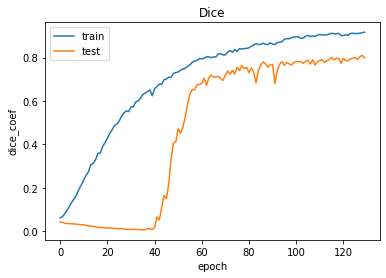

In [ ]:
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('Dice')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

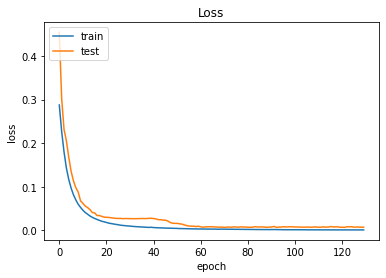

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('test000.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from tensorflow import keras
model = keras.models.load_model('test000.h5', compile=False)

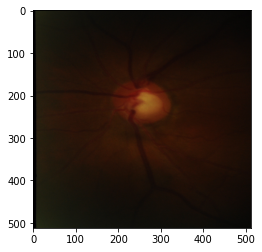

In [ ]:
test_img = cv2.imread('data/train/image/Rim2.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (512, 512))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#test_img = test_img[...,::-1]
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)


prediction = model.predict(test_img)
prediction = prediction > 0.1

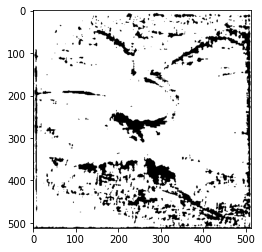

In [ ]:
#View and Save segmented image

prediction_image = prediction.reshape(rmask.shape)
#prediction_image = prediction_image*255
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')